In [1]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
%%time
from rdflib import ConjunctiveGraph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph

ns = {"nb": "http://bise-eu.info/core-ontology#",
      "dc": "http://dcterms/",
      "p-plan": "http://purl.org/net/p-plan#",
      "edam": "http://purl.obolibrary.org/obo/edam#"}

kg = ConjunctiveGraph()

### latest version of the RDF dataset dump
kg.parse("https://raw.githubusercontent.com/bio-tools/content/master/datasets/bise-ontology-biii-dump.ttl", format="turtle")
kg.parse("bise-linked-data-webapp/static/data/EDAM-bioimaging_alpha03.owl")
print(str(len(kg)) + ' triples in Biii data graph')

27864 triples in Biii data graph
CPU times: user 1.52 s, sys: 63.4 ms, total: 1.58 s
Wall time: 1.91 s


In [22]:
Q1 = """
CONSTRUCT {
    ?s1 <requires> ?d1
} WHERE {
    ?s1 a <http://biii.eu/software> .
    ?s1 <http://bise-eu.info/core-ontology#requires> ?d1 .
} LIMIT 100
"""

Q2 = """
CONSTRUCT {
    ?a1 <share_same_interests_with> ?a2 .
} where {
    ?s1 a <http://biii.eu/software> .
    ?s1 <http://bise-eu.info/core-ontology#hasAuthor> ?a1 .
    ?s1 <http://bise-eu.info/core-ontology#hasFunction> ?f1 .

    ?s2 a <http://biii.eu/software> .
    ?s2 <http://bise-eu.info/core-ontology#hasAuthor> ?a2 .
    ?s2 <http://bise-eu.info/core-ontology#hasFunction> ?f1 .
} LIMIT 1000
"""

res_kg = kg.query(Q2)

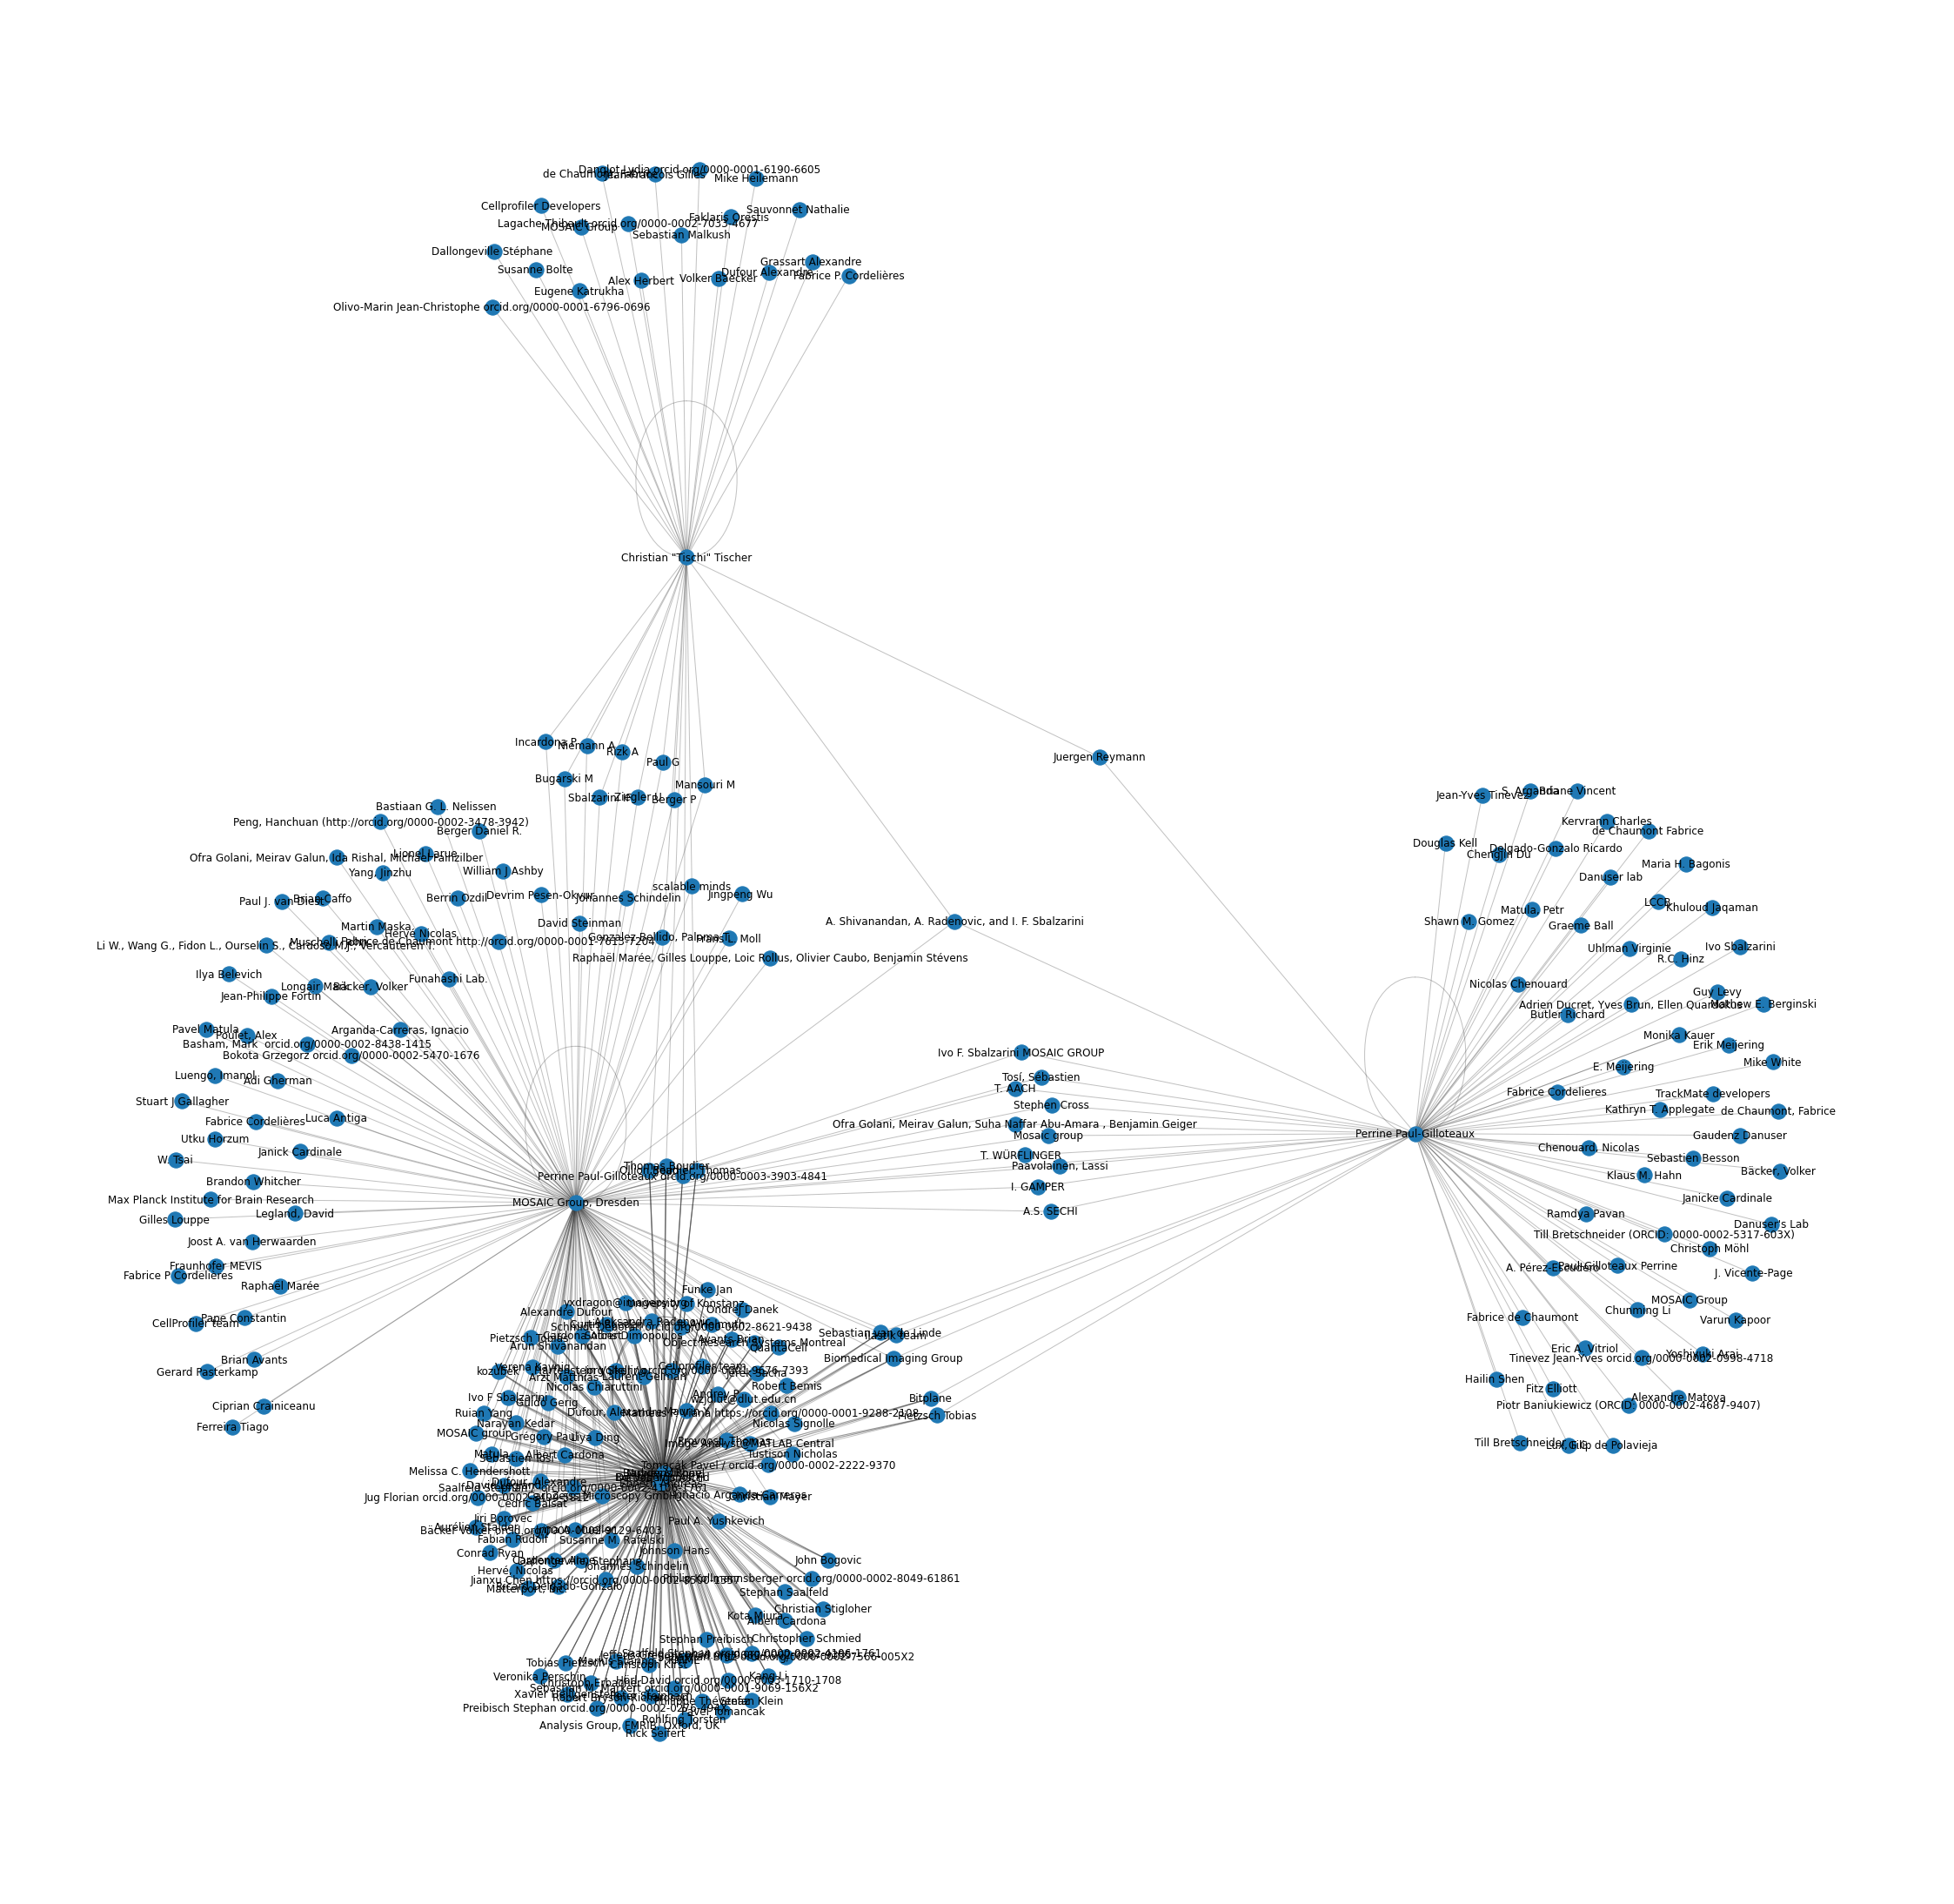

In [25]:
G = rdflib_to_networkx_graph(res_kg)
fig, ax = plt.subplots(1, 1, figsize=(40, 40));

nx.draw_spring(G, ax=ax, with_labels=True, edge_color=(0.2,0.2,0.2,0.3))